# Robótica Móvel - Projeto Final

In [44]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import random

from scipy import ndimage
from tqdm import tqdm_notebook as tqdm

FIG_SIZE = (8, 6)
HEATMAP_EXTENSION = 'png'
MAX_JUMP = 10

def get_neighbours(array, index):
    '''
        Get neighbour cells of the cell with given index in an array.

        @array: (numpy array) Array.
        @index: (int, int) Index of cell.

        @return: (numpy array) Array with the indices of neighbour cells.
    '''

    matrix = np.array(array)
    indices = tuple(np.transpose(np.atleast_2d(index)))
    arr_shape = np.shape(matrix)
    dist = np.ones(arr_shape)
    dist[indices] = 0
    dist = ndimage.distance_transform_cdt(dist, metric='chessboard')
    nb_indices = np.transpose(np.nonzero(dist == 1))
    return [tuple(x) for x in nb_indices]

def get_random_sampling_points(max_reward, height, width):
    first = random.uniform(0, max_reward)
    array = [[-1 for _ in range(width)] for _ in range(height)]
    array[0][0] = first
    
    print('[+] Creating sampling points.')
    for i in tqdm(range(height)):
        for j in range(0, width):
            if array[i][j] == -1: # not set
                neighbours = get_neighbours(array, (i, j))
                
                average = [0, 0]
                for (n_i, n_j) in neighbours:
                    if array[n_i][n_j] != -1:
                        average[0] += array[n_i][n_j]
                        average[1] += 1
                        
                average = average[0] / average[1]
                
                min_v = max(0, average - MAX_JUMP)
                max_v = min(max_r, average + MAX_JUMP)
                
                array[i][j] = random.uniform(min_v, max_v)
    
    plt.figure(figsize=FIG_SIZE)
    plt.imshow(array, cmap=cm.winter)
    plt.colorbar()
    plt.tight_layout()
    plt.savefig('./heatmaps/map_max{}_h{}_w{}.{}'.format(max_reward, height, width, HEATMAP_EXTENSION), dpi=DPI)
    plt.show()
    
    array = np.array(array)
    np.savetxt('./points_max{}_h{}_w{}.txt'.format(max_reward, height, width), array, fmt='%.2f', delimiter=' ')
    return array

[+] Creating sampling points.


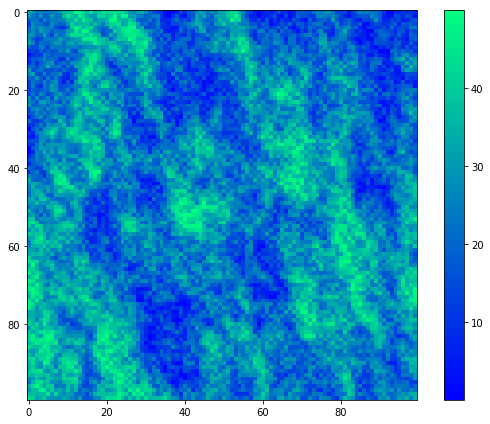

In [47]:
a = get_random_sampling_points(50, 100, 100)